In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, date
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import adfuller
import plotly.graph_objects as go
from numpy import std
#from pandas_profiling import ProfileReport
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [165]:
spring_lupa=pd.read_csv(r'C:\Users\DheerajJ\Desktop\acea\aceawateranalytics\datasets\Water_Spring_Lupa.csv')


In [166]:
spring_lupa.head()

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,01/01/2009,2.797,NaN
1,02/01/2009,2.797,NaN
2,03/01/2009,2.797,NaN
3,04/01/2009,2.797,NaN
4,05/01/2009,2.797,NaN


In [167]:
spring_lupa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4199 non-null   object 
 1   Rainfall_Terni  4199 non-null   float64
 2   Flow_Rate_Lupa  3817 non-null   float64
dtypes: float64(2), object(1)
memory usage: 98.5+ KB


In [168]:
spring_lupa.isnull().sum()

Date                0
Rainfall_Terni      0
Flow_Rate_Lupa    382
dtype: int64

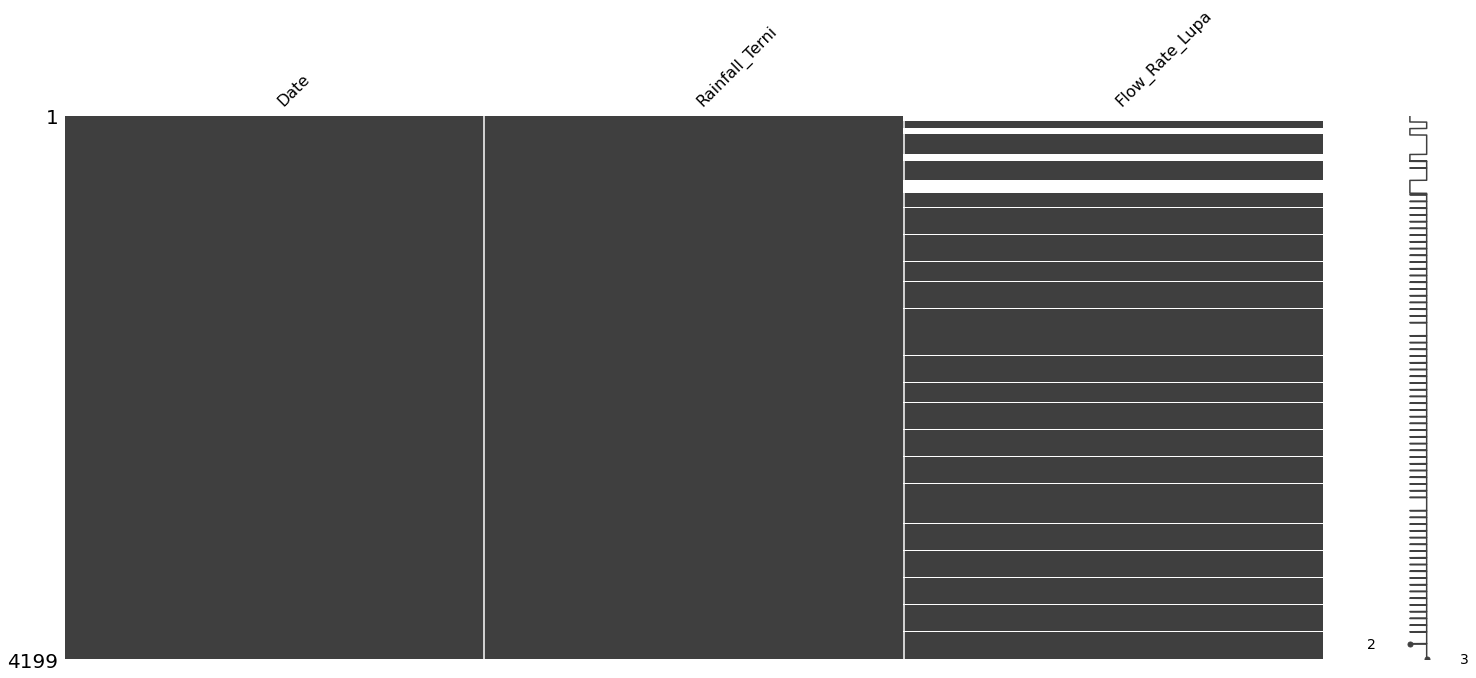

In [169]:
msno.matrix(spring_lupa)

In [170]:
col_names=pd.Series(spring_lupa.columns)
col_names

0              Date
1    Rainfall_Terni
2    Flow_Rate_Lupa
dtype: object

In [171]:
spring_lupa['Date']=pd.to_datetime(spring_lupa['Date'],format='%d/%m/%Y')
df=spring_lupa.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4199 non-null   datetime64[ns]
 1   Rainfall_Terni  4199 non-null   float64       
 2   Flow_Rate_Lupa  3817 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 98.5 KB


numpy.ndarray

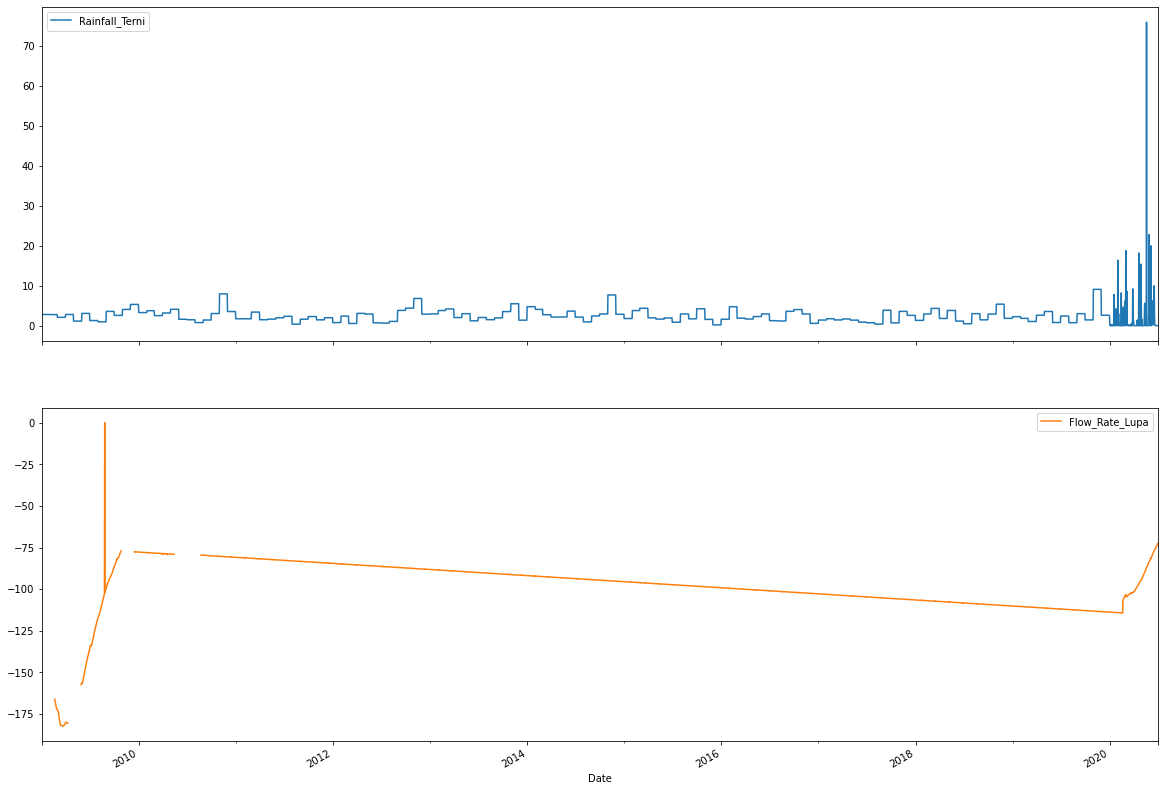

In [172]:
axes = df.plot.line(x='Date',subplots=True,figsize=(20,15))
type(axes)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D61A7801C8>],
      dtype=object)

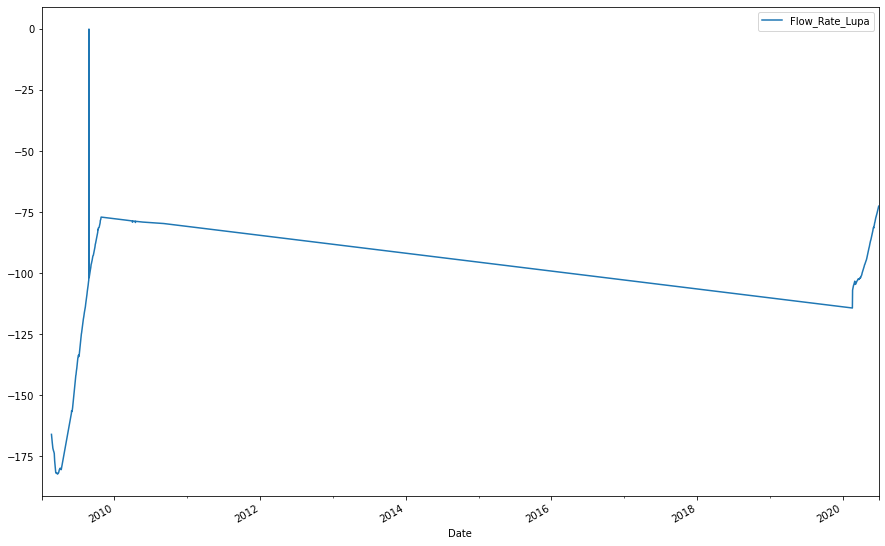

In [173]:
#filling missing values
col_no=2
df.loc[:,col_names[col_no]]=df[col_names[col_no]].interpolate()
df1=df[['Date','Flow_Rate_Lupa']]
df1.plot.line(x='Date',subplots=True,figsize=(15,10))

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4199 non-null   datetime64[ns]
 1   Rainfall_Terni  4199 non-null   float64       
 2   Flow_Rate_Lupa  4150 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 98.5 KB


In [175]:
#dropping first 50 nan values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4150 entries, 49 to 4198
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4150 non-null   datetime64[ns]
 1   Rainfall_Terni  4150 non-null   float64       
 2   Flow_Rate_Lupa  4150 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 129.7 KB


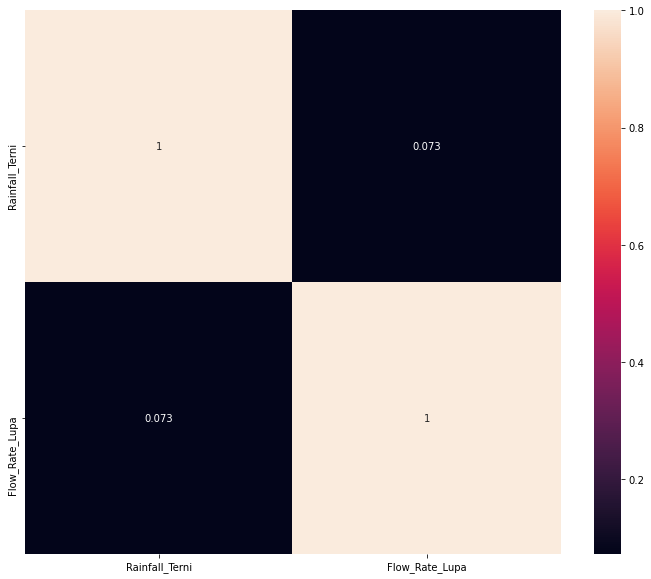

In [176]:
corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

In [177]:
#feature_engineering
temp_df=df.copy()
temp_df['Year']=pd.DatetimeIndex(temp_df['Date']).year
temp_df['month']=pd.DatetimeIndex(temp_df['Date']).month
temp_df['day']=pd.DatetimeIndex(temp_df['Date']).day
month_in_year = 12
temp_df['month_sin'] = np.sin(2*np.pi*temp_df.month/month_in_year)
temp_df['month_cos'] = np.cos(2*np.pi*temp_df.month/month_in_year)
temp_df['quater'] = temp_df.month%12 // 3 + 1
temp_df['week_of_month']=(temp_df['day']-1)//7+1
temp_df['day_of_year'] = pd.DatetimeIndex(temp_df['Date']).dayofyear
days_in_year = 365.25
temp_df['day_of_year_sin'] = np.sin(2*np.pi*temp_df.day_of_year/days_in_year)
temp_df['day_of_year_cos'] = np.cos(2*np.pi*temp_df.day_of_year/days_in_year)

temp_df['week_of_year'] = pd.DatetimeIndex(temp_df['Date']).weekofyear
weeks_in_year = 52.1429
temp_df['week_of_year_sin'] = np.sin(2*np.pi*temp_df.week_of_year/weeks_in_year)
temp_df['week_of_year_cos'] = np.cos(2*np.pi*temp_df.week_of_year/weeks_in_year)


In [178]:
#ADF test
result = adfuller(df['Flow_Rate_Lupa'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('%s: %.3f' % (key, value))
# The data is stationary

c:\users\dheerajj\appdata\local\programs\python\python37\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


ADF Statistic: -5.127940
p-value: 0.000012
Critical Values:
1%: -3.432
5%: -2.862
10%: -2.567


In [179]:
df.set_index('Date',inplace=True)
df.head()

,Rainfall_Terni,Flow_Rate_Lupa
Date,,
2009-02-19,2.763,-166.02
2009-02-20,2.763,-166.97
2009-02-21,2.763,-167.72
2009-02-22,2.763,-168.65
2009-02-23,2.763,-169.42


In [180]:
annual_resampled_data=df.resample('A').mean()
week_resampled_data=df.resample('W').mean()

In [181]:
corr_annual = pd.DataFrame(columns=['col1','col2','lag'])
column_names = col_names.drop(labels=[0,2])

for lagging in column_names:
    for i in range(-5,4):
        lag = i
        col1 = col_names[2]
        col2 = lagging
        correlation = annual_resampled_data[col1].corr(annual_resampled_data[col2].shift(-lag))
        corr_annual=corr_annual.append(pd.DataFrame({'col1':col1,
                                                     'col2':col2,
                                                     'lag':lag,
                                                     'correlation':correlation},index=[0]))
corr_annual.sort_values(by=['correlation'],ascending=False)

,col1,col2,lag,correlation
0,Flow_Rate_Lupa,Rainfall_Terni,2,0.582903
0,Flow_Rate_Lupa,Rainfall_Terni,-2,0.401436
0,Flow_Rate_Lupa,Rainfall_Terni,-1,0.315085
0,Flow_Rate_Lupa,Rainfall_Terni,3,0.264128
0,Flow_Rate_Lupa,Rainfall_Terni,-3,0.087781
0,Flow_Rate_Lupa,Rainfall_Terni,0,0.063240
0,Flow_Rate_Lupa,Rainfall_Terni,-4,-0.004242
0,Flow_Rate_Lupa,Rainfall_Terni,1,-0.182013
0,Flow_Rate_Lupa,Rainfall_Terni,-5,-0.322403


In [182]:
column_names

1    Rainfall_Terni
dtype: object

In [183]:
corr_week = pd.DataFrame(columns=['col1','col2','lag','correlation'])
column_names = col_names.drop(labels=[0,2])

for lagging in column_names:
    for i in range(-13,13):
        lag = i
        col1 = col_names[2]
        col2 = lagging
        correlation = week_resampled_data[col1].corr(week_resampled_data[col2].shift(-lag))
        corr_week=corr_week.append(pd.DataFrame({'col1':col1,
                                                     'col2':col2,
                                                     'lag':lag,
                                                     'correlation':correlation},index=[0]))
corr_week.sort_values(by=['correlation'],ascending=False)

,col1,col2,lag,correlation
0,Flow_Rate_Lupa,Rainfall_Terni,9,0.106644
0,Flow_Rate_Lupa,Rainfall_Terni,8,0.106480
0,Flow_Rate_Lupa,Rainfall_Terni,10,0.105306
0,Flow_Rate_Lupa,Rainfall_Terni,7,0.104613
0,Flow_Rate_Lupa,Rainfall_Terni,5,0.103655
0,Flow_Rate_Lupa,Rainfall_Terni,4,0.103613
0,Flow_Rate_Lupa,Rainfall_Terni,6,0.103083
0,Flow_Rate_Lupa,Rainfall_Terni,2,0.102651
0,Flow_Rate_Lupa,Rainfall_Terni,3,0.102095
0,Flow_Rate_Lupa,Rainfall_Terni,1,0.100791


In [184]:
#daly correlation
corr_daily = pd.DataFrame(columns=['col1','col2','lag','correlation'])
column_names = col_names.drop(labels=[0,2])

for lagging in column_names:
    for i in range(-7,7):
        lag = i
        col1 = col_names[2]
        col2 = lagging
        correlation = df[col1].corr(df[col2].shift(-lag))
        corr_daily=corr_daily.append(pd.DataFrame({'col1':col1,
                                                     'col2':col2,
                                                     'lag':lag,
                                                     'correlation':correlation},index=[0]))
corr_daily.sort_values(by=['correlation'],ascending=False)

,col1,col2,lag,correlation
0,Flow_Rate_Lupa,Rainfall_Terni,6,0.077729
0,Flow_Rate_Lupa,Rainfall_Terni,5,0.075373
0,Flow_Rate_Lupa,Rainfall_Terni,-7,0.075198
0,Flow_Rate_Lupa,Rainfall_Terni,4,0.075060
0,Flow_Rate_Lupa,Rainfall_Terni,-6,0.075026
0,Flow_Rate_Lupa,Rainfall_Terni,3,0.074739
0,Flow_Rate_Lupa,Rainfall_Terni,-5,0.074359
0,Flow_Rate_Lupa,Rainfall_Terni,2,0.074216
0,Flow_Rate_Lupa,Rainfall_Terni,-4,0.074064
0,Flow_Rate_Lupa,Rainfall_Terni,1,0.073762


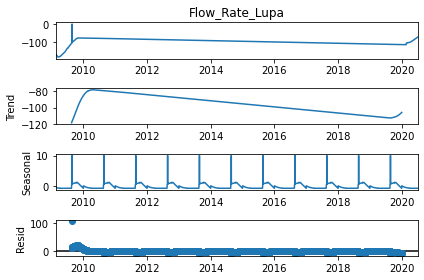

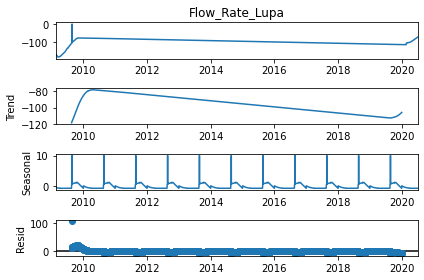

In [185]:
decomposition = seasonal_decompose(df['Flow_Rate_Lupa'],period=365, model='additive')
decomposition.plot()

In [186]:
temp_df['Seasonal365']=decomposition.seasonal

In [187]:
def find_start_position(bilancino):
    
    #bilancino.set_index("Date",inplace = True)
    df = bilancino.copy()

 

    # Dropping the columns which do not have null values at the start

 

    col_drop = []
    col_names = pd.Series(df.columns)
    for j in range(len(df.columns)):
        if pd.notnull(df.iloc[0,j]):
            col_drop.append(j)
    for i in col_drop:
        df.drop(labels=col_names[i],axis=1,inplace=True)

 

    # Finding the position in the dataframe which we will be considered for further analysis

 

    pos = []
    for j in range(len(col_names)-len(col_drop)):
        for i in range(len(df)):
            if pd.notnull(df.iloc[i,j]):
                pos.append(i)
                break
                
    # returning the new dataset 
    #print(df)
    return df[max(pos):]

In [188]:
find_start_position()

TypeError: find_start_position() missing 1 required positional argument: 'bilancino'

In [189]:
df.loc[df['Flow_Rate_Lupa']==0,'Flow_Rate_Lupa']=np.nan
df.interpolate(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4150 entries, 2009-02-19 to 2020-06-30
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rainfall_Terni  4150 non-null   float64
 1   Flow_Rate_Lupa  4150 non-null   float64
dtypes: float64(2)
memory usage: 97.3 KB


In [190]:
#1-Summer
#2-Winter
#3-Spring
#4-Autumn
temp_df['Season']=0
temp_df.loc[(temp_df['month']==3)|(temp_df['month']==4)|(temp_df['month']==5),'Season']=3
temp_df.loc[(temp_df['month']==6)|(temp_df['month']==7)|(temp_df['month']==8),'Season']=1
temp_df.loc[(temp_df['month']==12)|(temp_df['month']==1)|(temp_df['month']==2),'Season']=2
temp_df.loc[(temp_df['month']==9)|(temp_df['month']==10)|(temp_df['month']==11),'Season']=4

In [191]:
temp_df.Season.value_counts()

3    1104
1    1042
2    1003
4    1001
Name: Season, dtype: int64

In [192]:
std=df.std()
mean=df.mean()
cut_off=3*std[1]
lower=mean[1]-cut_off
upper=mean[1]+cut_off


In [193]:
#outlier detection
outliers = [x for x in df.Flow_Rate_Lupa if x < lower or x > upper]
df.loc[df['Flow_Rate_Lupa'].isin(outliers),'Flow_Rate_Lupa']=np.nan
df.isna().sum()

Rainfall_Terni      0
Flow_Rate_Lupa    115
dtype: int64

In [198]:
#outlier removal
x1=df[df['Flow_Rate_Lupa'].isnull()]
df=df[115:]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4035 entries, 2009-06-14 to 2020-06-30
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rainfall_Terni  4035 non-null   float64
 1   Flow_Rate_Lupa  4035 non-null   float64
dtypes: float64(2)
memory usage: 94.6 KB


In [202]:
df[col_names[1]].value_counts()

0.000     103
2.927      89
1.477      61
2.600      34
1.276      31
         ... 
8.200       1
18.200      1
4.400       1
1.400       1
1.200       1
Name: Rainfall_Terni, Length: 160, dtype: int64